In [1]:
import numpy as np
import pandas as pd
import os


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk
import sklearn


from tensorflow import keras
from keras.preprocessing.text import text_to_word_sequence
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# nltk.download()

2021-11-15 17:31:42.428844: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-15 17:31:42.428868: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
dataset = pd.read_csv("./BBC News Train.csv")
test_set = pd.read_csv("./BBC News Test.csv")


In [4]:
dataset.head()


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [5]:
target_category = dataset["Category"].unique()
target_category


array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [6]:
dataset["categoryId"] = dataset["Category"].factorize()[0]
dataset.head()


,ArticleId,Text,Category,categoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


In [7]:
category = (
    dataset[["Category", "categoryId"]].drop_duplicates().sort_values("categoryId")
)
category


,Category,categoryId
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


In [8]:
dataset.groupby('Category').categoryId.count()

Category
business         336
entertainment    273
politics         274
sport            346
tech             261
Name: categoryId, dtype: int64

<AxesSubplot:xlabel='Category'>

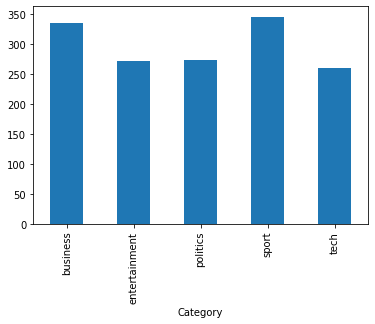

In [9]:
dataset.groupby("Category").categoryId.count().plot.bar(ylim=0)


In [10]:
text = dataset["Text"]
text.head()


0    worldcom ex-boss launches defence lawyers defe...
1    german business confidence slides german busin...
2    bbc poll indicates economic gloom citizens in ...
3    lifestyle  governs mobile choice  faster  bett...
4    enron bosses in $168m payout eighteen former e...
Name: Text, dtype: object

In [11]:
category = dataset["Category"]
category.head()


0    business
1    business
2    business
3        tech
4    business
Name: Category, dtype: object

In [12]:
def preprocessDataset(train_text):

    # word tokenization using text-to-word-sequence
    train_text = str(train_text)
    tokenized_train_set = text_to_word_sequence(
        train_text,
        filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
        lower=True,
        split=" ",
    )

    # stop word removal
    stop_words = set(stopwords.words("english"))
    stopwordremove = [i for i in tokenized_train_set if not i in stop_words]

    # join words into sentence
    stopwordremove_text = " ".join(stopwordremove)

    # remove numbers
    numberremove_text = "".join(c for c in stopwordremove_text if not c.isdigit())

    # --Stemming--
    stemmer = PorterStemmer()

    stem_input = nltk.word_tokenize(numberremove_text)
    stem_text = " ".join([stemmer.stem(word) for word in stem_input])

    lemmatizer = WordNetLemmatizer()

    def get_wordnet_pos(word):
        """Map POS tag to first character lemmatize() accepts"""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {
            "J": wordnet.ADJ,
            "N": wordnet.NOUN,
            "V": wordnet.VERB,
            "R": wordnet.ADV,
        }

        return tag_dict.get(tag, wordnet.NOUN)

    lem_input = nltk.word_tokenize(stem_text)
    lem_text = " ".join(
        [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in lem_input]
    )

    return lem_text


In [13]:
dataset["Text"] = dataset["Text"].apply(preprocessDataset)
text = dataset["Text"]
category = dataset["Category"]
text.head()


LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - '/home/tarushfx/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
